<a href="https://colab.research.google.com/github/nopimhra/Students-Performance-Clustring/blob/main/Students_performance_clustering_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSgDrtE9D4-LrYlaFDRMMQP_f35VbTT_6RiRWGMYOFPSm5U3DyILl1y3a7YX6GI7XhYg8C5luH-kx_C/pub?output=csv')
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

In [ ]:
df.describe()

,student_id,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.0,0.0,300.000000,300.000000,300.000000,300.0,300.000000,300.0,300.000000
mean,150.500000,21.550000,7.254667,5.866667,5.469000,5.0,NaN,19.969000,37.375000,2.806033,12.0,6.013333,6.0,3.110000
std,86.746758,2.241483,1.611791,2.414786,2.711083,0.0,NaN,8.272229,11.796774,0.732694,0.0,3.726407,0.0,1.982676
min,1.000000,18.000000,2.800000,0.000000,0.000000,5.0,NaN,0.000000,0.000000,0.610000,12.0,0.000000,6.0,0.000000
25%,75.750000,20.000000,6.075000,4.000000,3.600000,5.0,NaN,14.225000,29.875000,2.327500,12.0,3.000000,6.0,1.000000
50%,150.500000,22.000000,7.300000,5.800000,5.600000,5.0,NaN,21.350000,39.600000,2.800000,12.0,6.000000,6.0,3.000000
75%,225.250000,23.000000,8.400000,7.700000,7.200000,5.0,NaN,27.425000,49.550000,3.320000,12.0,9.000000,6.0,5.000000
max,300.000000,25.000000,10.000000,10.000000,10.000000,5.0,NaN,30.000000,50.000000,4.000000,12.0,12.000000,6.0,6.000000


# **isi fitur assignments_submitted dengan metode contextual random**

In [ ]:
df["lecture_attendance_ratio"] = df["lectures_attended"] / df["total_lectures"]
df["lab_attendance_ratio"] = df["labs_attended"] / df["total_lab_sessions"]

In [ ]:
df["engagement_score"] = (
    0.4 * df["lecture_attendance_ratio"] +
    0.3 * df["lab_attendance_ratio"] +
    0.3 * (df["previous_gpa"] / 4)
)

In [ ]:
def generate_assignments(row):
    max_assignments = row["total_assignments"]
    base = row["engagement_score"]
    noise = np.random.normal(0, 0.1)
    ratio = min(max(base + noise, 0), 1)
    return int(round(ratio * max_assignments))

df["assignments_submitted"] = df.apply(generate_assignments, axis=1)

In [ ]:
df.drop(columns=["lecture_attendance_ratio", "lab_attendance_ratio", "engagement_score"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  300 non-null    int64  
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

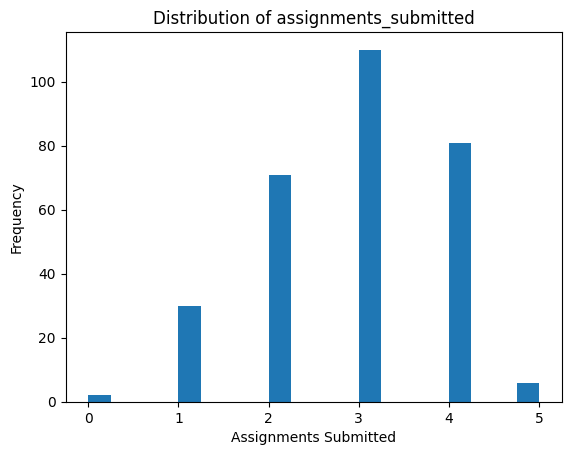

In [ ]:
plt.figure()
plt.hist(df["assignments_submitted"], bins=20)
plt.xlabel("Assignments Submitted")
plt.ylabel("Frequency")
plt.title("Distribution of assignments_submitted")
plt.show()

# **Feature Engineering**

In [ ]:
df["quiz_average"]=(df["quiz1_marks"]+df["quiz2_marks"]+df["quiz3_marks"])/3
df["assignment_completion_rate"]=df["assignments_submitted"]/df["total_assignments"]
df["overall_attendance_rate"]=(df["lectures_attended"]+df["labs_attended"])/(df["total_lectures"]+df["total_lab_sessions"])
df["performance_index"]=0.4*df["quiz_average"]+0.3*df["midterm_marks"]+0.3*df["final_marks"]
df.head()

,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,quiz_average,assignment_completion_rate,overall_attendance_rate,performance_index
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,1,30.0,36.5,2.57,12,4,6,1,7.033333,0.2,0.277778,22.763333
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,3,25.4,33.0,2.40,12,1,6,5,7.333333,0.6,0.333333,20.453333
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,0,14.4,24.8,2.99,12,0,6,0,3.000000,0.0,0.000000,12.960000
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,2,17.7,41.0,1.68,12,9,6,0,5.866667,0.4,0.500000,19.956667
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,3,23.8,31.0,2.53,12,7,6,4,4.733333,0.6,0.611111,18.333333


In [ ]:
cols = [
    'previous_gpa',
    'quiz_average',
    'assignment_completion_rate',
    'overall_attendance_rate',
    'performance_index'
]

new_df = df[cols]
new_df.head()

,previous_gpa,quiz_average,assignment_completion_rate,overall_attendance_rate,performance_index
0,2.57,7.033333,0.2,0.277778,22.763333
1,2.40,7.333333,0.6,0.333333,20.453333
2,2.99,3.000000,0.0,0.000000,12.960000
3,1.68,5.866667,0.4,0.500000,19.956667
4,2.53,4.733333,0.6,0.611111,18.333333


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   previous_gpa                300 non-null    float64
 1   quiz_average                300 non-null    float64
 2   assignment_completion_rate  300 non-null    float64
 3   overall_attendance_rate     300 non-null    float64
 4   performance_index           300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [ ]:
new_df.isna().sum()

,0
previous_gpa,0
quiz_average,0
assignment_completion_rate,0
overall_attendance_rate,0
performance_index,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

scaled_data

array([[-0.32268287,  0.65487181, -1.83045329, -0.98581198,  0.72001382],
       [-0.5550911 ,  0.8897176 ,  0.14485602, -0.74673066,  0.1802527 ],
       [ 0.25150216, -2.50249926, -2.81810795, -2.18121859, -1.57066074],
       ...,
       [-0.84218361, -0.25841734,  0.14485602,  0.44867595, -1.19056921],
       [ 0.60695003, -0.4149812 ,  0.14485602, -0.26856802,  0.05251702],
       [-0.04926143, -0.67592095,  0.14485602,  0.68775727,  0.24567829]])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
principal_components=pd.DataFrame(pca.fit_transform(scaled_data), columns=['PCA1','PCA2'])

principal_components

,PCA1,PCA2
0,-1.941660,1.085727
1,-0.487088,0.749300
2,-3.574226,-2.410831
3,-0.931442,-0.331919
4,0.284463,-1.124143
...,...,...
295,-0.953202,-0.082762
296,-2.026688,-1.659689
297,0.099495,-1.199115
298,0.053666,-0.125944


In [ ]:
pca.explained_variance_ratio_

array([0.36155303, 0.24946105])

In [ ]:
pca_loadings=pca.components_
loadings_df = pd.DataFrame(pca_loadings, columns=new_df.columns)
loadings_df

,previous_gpa,quiz_average,assignment_completion_rate,overall_attendance_rate,performance_index
0,0.208036,0.004586,0.708518,0.666016,0.105474
1,0.147120,0.684372,-0.026664,-0.133327,0.701073


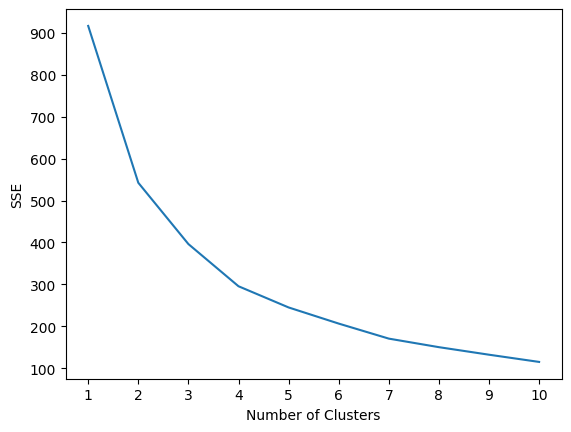

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principal_components)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kmeans = KMeans(init="random", n_clusters=4, n_init=10, random_state=1)
kmeans.fit(principal_components)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
principal_components['Cluster'] = clusters

In [ ]:
new_df['cluster'] = clusters
new_df.to_csv('clustered_data.csv', index=False)

/tmp/ipython-input-3121190871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = clusters


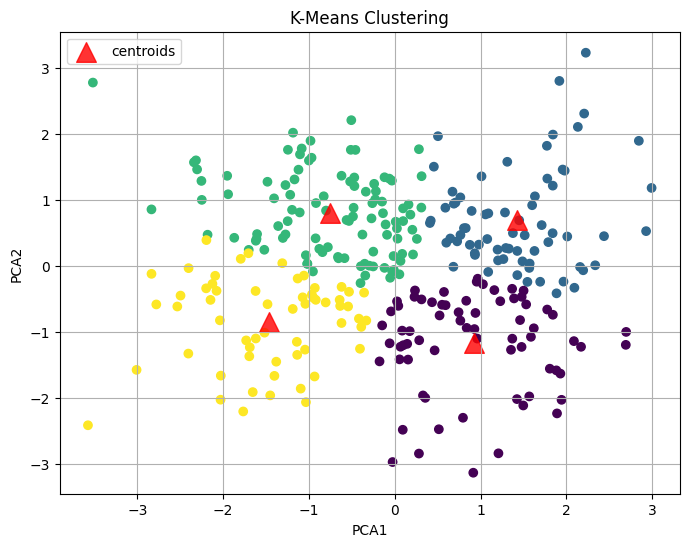

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principal_components['PCA1'], principal_components['PCA2'], c=kmeans.labels_)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker="^", label='centroids', alpha=0.8)
plt.title('K-Means Clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()


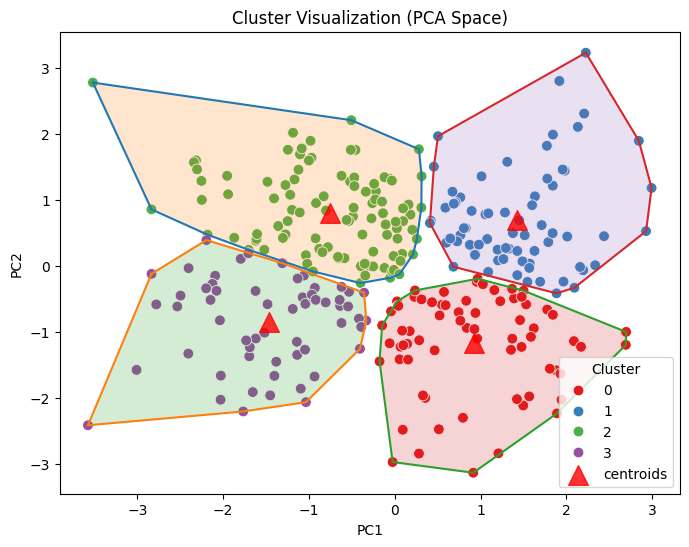

In [ ]:
import seaborn as sns
import numpy as np
from scipy.spatial import ConvexHull

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=principal_components,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="Set1",
    s=60
)

# Gambar convex hull tiap cluster
for cluster_id in principal_components["Cluster"].unique():
    subset = principal_components[principal_components["Cluster"] == cluster_id][["PCA1", "PCA2"]].values

    if len(subset) > 2:  # hull butuh minimal 3 titik
        hull = ConvexHull(subset)
        hull_points = subset[hull.vertices]
        hull_points = np.vstack([hull_points, hull_points[0]])  # tutup polygon

        plt.plot(hull_points[:,0], hull_points[:,1])
        plt.fill(hull_points[:,0], hull_points[:,1], alpha=0.2)

plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker="^", label='centroids', alpha=0.8)
plt.title("Cluster Visualization (PCA Space)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

In [ ]:
new_df['cluster'].value_counts()

,count
cluster,
2,102
1,70
0,69
3,59


In [ ]:
new_df.groupby('cluster').mean()

,previous_gpa,quiz_average,assignment_completion_rate,overall_attendance_rate,performance_index
cluster,,,,,
0,2.745797,5.200000,0.715942,0.685185,16.640000
1,3.098714,6.807143,0.751429,0.729365,22.533571
2,2.773529,6.891830,0.472549,0.349129,21.666732
3,2.585424,5.436723,0.355932,0.306968,16.424689


In [ ]:
new_df.groupby('cluster').std()

,previous_gpa,quiz_average,assignment_completion_rate,overall_attendance_rate,performance_index
cluster,,,,,
0,0.783879,1.072746,0.110644,0.155295,3.852949
1,0.548994,1.134454,0.109997,0.123656,3.154502
2,0.752849,0.935564,0.142923,0.128311,2.805647
3,0.736540,0.983478,0.139298,0.148913,3.638993


In [ ]:
new_df.groupby('cluster').median()

,previous_gpa,quiz_average,assignment_completion_rate,overall_attendance_rate,performance_index
cluster,,,,,
0,2.840,5.333333,0.8,0.666667,16.530000
1,3.120,6.750000,0.8,0.722222,22.681667
2,2.745,7.016667,0.4,0.333333,21.920000
3,2.560,5.466667,0.4,0.277778,17.080000
